<center>

| Nazwa przedmiotu                          | Dataset                                |
| ----------------------------------------- | -------------------------------------- |
| Projekt zespołowy - sztuczna inteligencja | laptop_prices_dataset                  |
|                                           |                                        |
| Piotr                                     | Goraj                                  |
| Numer albumu                              | 55529                                  |
|                                           |                                        |
| Bartosz                                   | Kiałka                                 |
| Numer albumu                              | 55528                                  |
|                                           |                                        |
| Data oddania sprawozdania                 | 2024.11.16                             |
| Kierunek                                  | Informatyka, II stopnia P, Stacjonarne |

</center>


Nazwa przedmiotu: Projekt zespołowy - sztuczna inteligencja

Kierunek: Informatyka, II stopnia P, Stacjonarne

Dataset: laptop_prices_dataset https://www.kaggle.com/datasets/owm4096/laptop-prices/data



Autorzy:

Piotr Goraj, nr. alb. 55529

Bartosz Kiałka, nr. alb. 55528



Data oddania sprawozdania: 2024.11.16

## 1. Instalacja i import bibliotek

In [1]:
# !pip install pandas
# !pip install scikit-learn
# !pip install numpy
# !pip install shap
# !pip install matplotlib
# !pip install seaborn
# !pip install --upgrade shap scikit-learn pandas numpy matplotlib

# !pip install --upgrade shap scikit-learn pandas numpy matplotlib
# !pip install --upgrade shap
# !pip install --upgrade matplotlib seaborn scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
import seaborn as sns

## 2. Odczyt danych do modelu

In [3]:
FILE_PATH = './model_data.csv'
model_data = pd.read_csv(FILE_PATH)

## 3. Model predykcyjny - Regresja

Wynik R2 dla modelu regresji: 0.7201348553928684


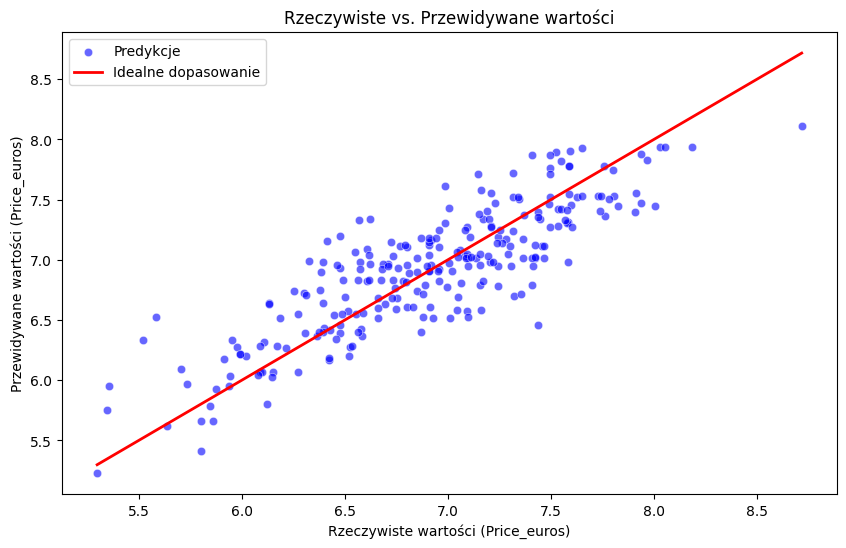

In [4]:
# wszystkie kolumny oprócz ceny
X_regression = model_data.drop(columns=['Price_euros'])  
y_regression = model_data['Price_euros']

# zbiory treningowy i testowy
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# tworzenie i trenowanie modelu
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

y_pred_reg = regression_model.predict(X_test_reg)

# współczynnik determinacji R^2
'''
Miara statystyczna, która określa, jak dobrze model regresji wyjaśnia zmienność danych. 
Jest szeroko stosowany w analizie regresji, aby ocenić, jak dobrze model dopasowuje się do danych.
'''
print("Wynik R2 dla modelu regresji:", r2_score(y_test_reg, y_pred_reg))

# Wykres rzeczywiste vs. przewidywane wartości
'''
Porównuje wartości rzeczywiste (z testowego zbioru danych) z przewidywanymi przez model, co pozwala ocenić dokładność predykcji.
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6, color='blue', label='Predykcje')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
         color='red', lw=2, label='Idealne dopasowanie')
plt.title("Rzeczywiste vs. Przewidywane wartości")
plt.xlabel("Rzeczywiste wartości (Price_euros)")
plt.ylabel("Przewidywane wartości (Price_euros)")
plt.legend()
plt.show()



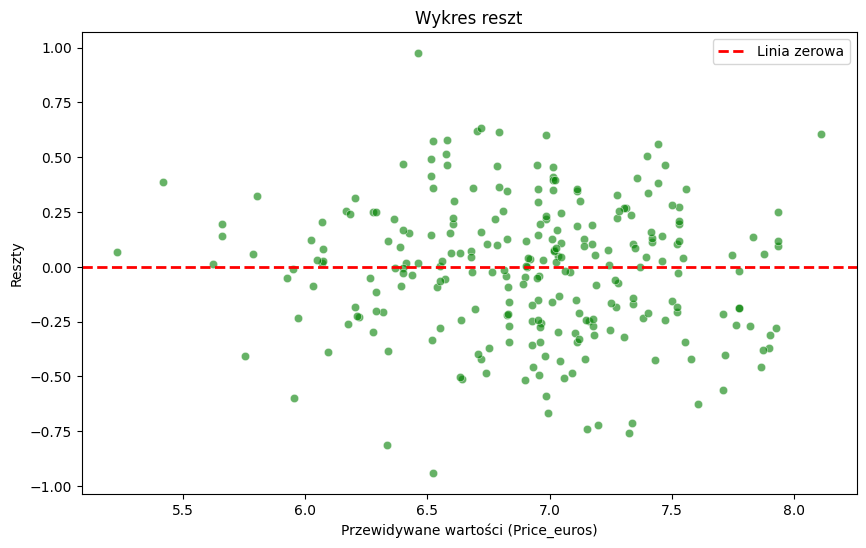

In [5]:
# Oblicz reszty (różnice między rzeczywistymi a przewidywanymi wartościami)
residuals = y_test_reg - y_pred_reg

# Wykres reszt
''' 
Pokazuje różnice między rzeczywistymi a przewidywanymi wartościami, pomagając zidentyfikować wzorce 
np. czy błędy są losowe i czy nie ma systematycznych wzorców. 
Idealnie punkty powinny być rozrzucone równomiernie wokół linii zerowej.
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_reg, y=residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2, label="Linia zerowa")
plt.title("Wykres reszt")
plt.xlabel("Przewidywane wartości (Price_euros)")
plt.ylabel("Reszty")
plt.legend()
plt.show()


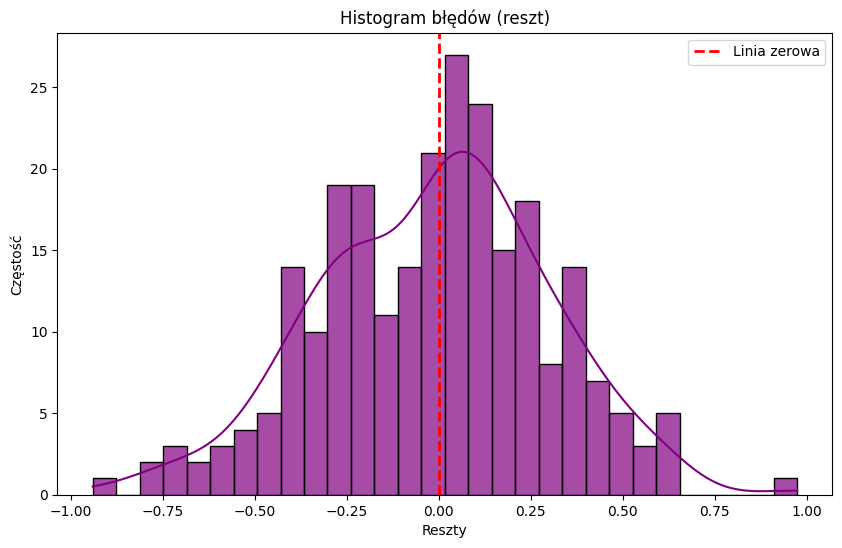

In [6]:
# Histogram błędów (reszt)
''' 
Przedstawia rozkład błędów modelu, pozwalając ocenić, czy są one zgodne z założeniami regresji.
W regresji liniowej oczekujemy, że błędy mają rozkład zbliżony do normalnego, skoncentrowanego wokół zera.
'''
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', lw=2, label="Linia zerowa")
plt.title("Histogram błędów (reszt)")
plt.xlabel("Reszty")
plt.ylabel("Częstość")
plt.legend()
plt.show()

## 4. Wykres Sumaryczny Wartości SHAP

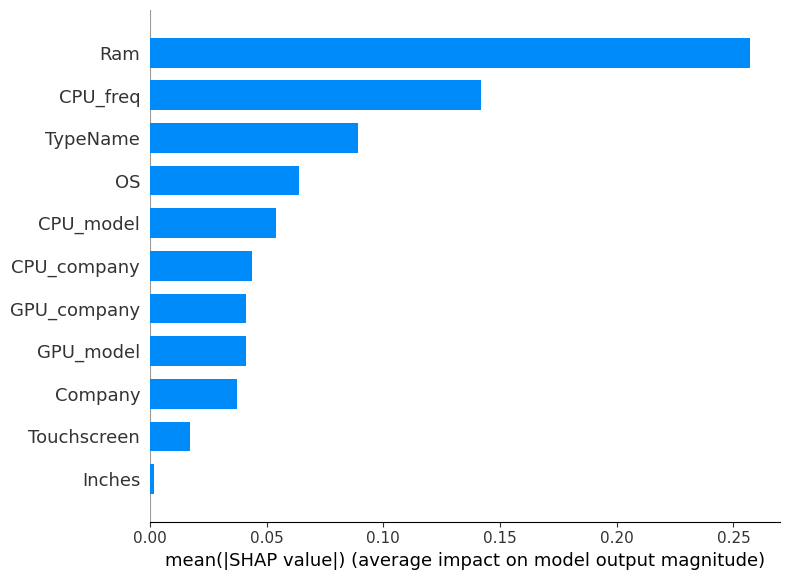

In [9]:
# wyjaśniacz SHAP dla modelu regresji liniowej
regression_explainer = shap.LinearExplainer(regression_model, X_train_reg)
regression_shap_values = regression_explainer.shap_values(X_test_reg)

# wykres sumaryczny wartości SHAP
shap.summary_plot(regression_shap_values, X_test_reg, plot_type="bar")
plt.show()



<Figure size 1000x600 with 0 Axes>

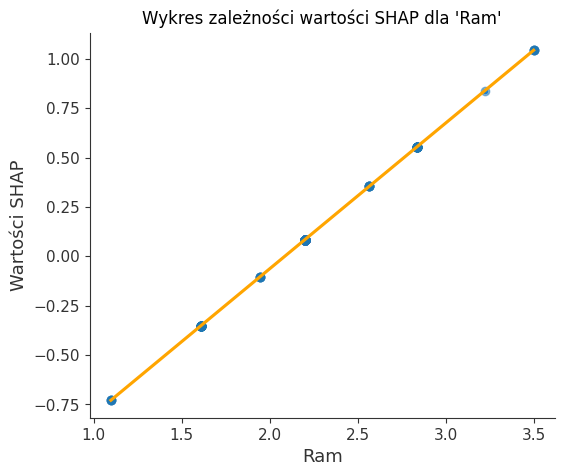

<Figure size 1000x600 with 0 Axes>

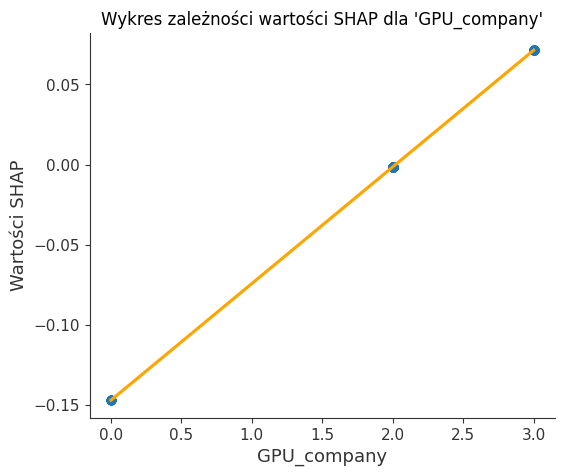

In [15]:
# wykres zależności dla cechy 'Ram'
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    "Ram", regression_shap_values, X_test_reg,
    interaction_index=None, show=False
)
plt.title("Wykres zależności wartości SHAP dla 'Ram'")
plt.xlabel("Ram")
plt.ylabel("Wartości SHAP")

# dodanie trendu regresji (regplot z seaborn)
sns.regplot(x=X_test_reg['Ram'], y=regression_shap_values[:, X_test_reg.columns.get_loc("Ram")], 
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ci=None)

plt.show()

# wykres zależności dla cechy 'OS'
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    "GPU_company", regression_shap_values, X_test_reg,
    interaction_index=None, show=False
)
plt.title("Wykres zależności wartości SHAP dla 'GPU_company'")
plt.xlabel("GPU_company")
plt.ylabel("Wartości SHAP")

# dodanie trendu regresji (regplot z seaborn)
sns.regplot(x=X_test_reg['GPU_company'], y=regression_shap_values[:, X_test_reg.columns.get_loc("GPU_company")], 
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ci=None)

plt.show()


## 5. Model klasyfikacji - Wartości Shapleya i interpretacja


Dokładność modelu klasyfikacyjnego: 0.792156862745098


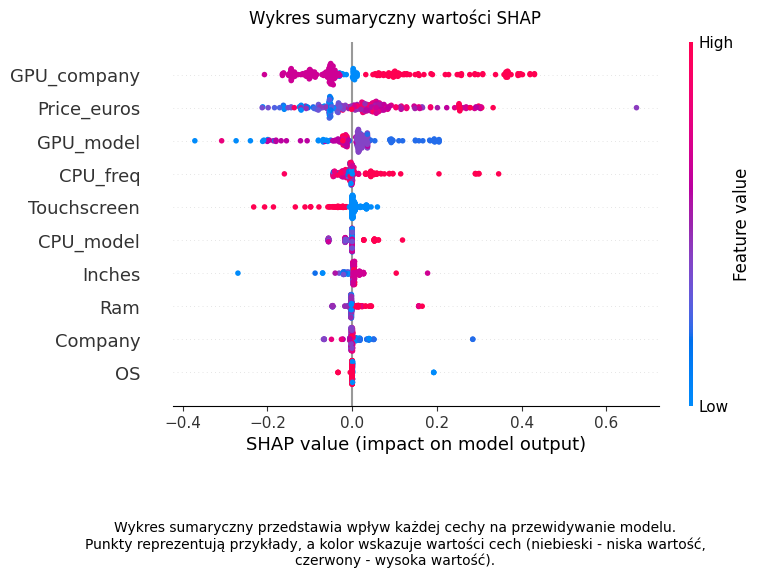

<Figure size 640x480 with 0 Axes>

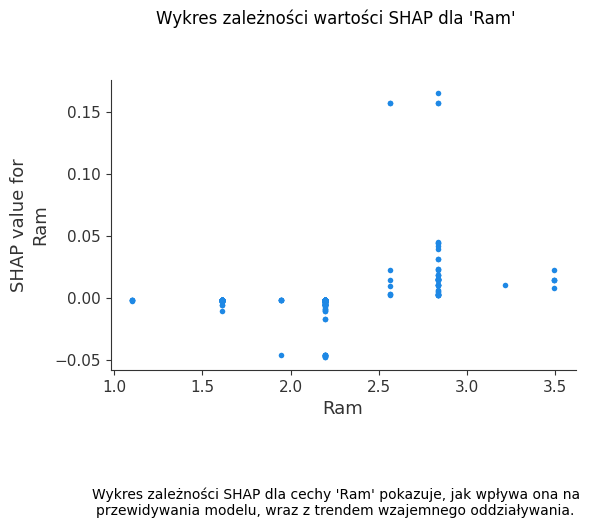

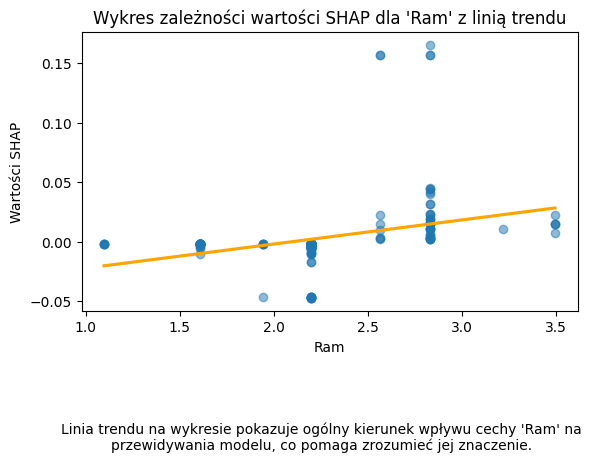

In [8]:
# Zakodowanie etykiet dla kolumny 'TypeName'
y_classification = model_data['TypeName'].astype('category').cat.codes
X_classification = model_data.drop(columns=['TypeName'])

# Podział danych na zbiory treningowy i testowy
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Resetowanie indeksów
X_test_cls = X_test_cls.reset_index(drop=True)

# Trenowanie modelu dla pełnego zestawu cech
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5
)

# Dopasowanie najlepszego modelu
grid_search.fit(X_train_cls, y_train_cls)
best_classifier = grid_search.best_estimator_

# Ocena dokładności na zbiorze testowym
y_pred_cls = best_classifier.predict(X_test_cls)
print("\nDokładność modelu klasyfikacyjnego:", accuracy_score(y_test_cls, y_pred_cls))

# Tworzenie próbki referencyjnej
background_top = X_train_cls.sample(100, random_state=42)

# Tworzenie wyjaśniacza SHAP z pełnym zestawem cech
classification_explainer = shap.TreeExplainer(best_classifier, background_top)

# Obliczenie wartości SHAP dla wszystkich klas na X_test_cls
shap_values = classification_explainer.shap_values(X_test_cls)

# Określenie liczby klas
if isinstance(shap_values, list):
    num_classes = len(shap_values)
else:
    num_classes = shap_values.shape[2] if len(shap_values.shape) == 3 else 1

# Wybór klasy do analizy
class_index = 0  # Możesz zmienić indeks klasy, jeśli chcesz analizować inną klasę

# Pobranie shap_values dla wybranej klasy
if isinstance(shap_values, list):
    shap_values_single_class = shap_values[class_index]
else:
    if num_classes > 1:
        shap_values_single_class = shap_values[:, :, class_index]
    else:
        shap_values_single_class = shap_values

# Konwersja shap_values_single_class do DataFrame z odpowiednimi nazwami kolumn
shap_values_single_class = pd.DataFrame(shap_values_single_class, columns=X_test_cls.columns)
shap_values_single_class = shap_values_single_class.reset_index(drop=True)

# Sprawdzenie i przycięcie shap_values_single_class, jeśli ma dodatkowe kolumny
if shap_values_single_class.shape[1] > X_test_cls.shape[1]:
    shap_values_single_class = shap_values_single_class.iloc[:, :X_test_cls.shape[1]]

# Wybór typu wykresu SHAP
plot_type = "dot"  # Zmień na "bar", jeśli chcesz wykres słupkowy

# Generowanie wykresu sumarycznego
plt.figure()
shap.summary_plot(shap_values_single_class.values, X_test_cls, plot_type=plot_type, max_display=10, show=False)
plt.subplots_adjust(bottom=0.3)  # Zwiększenie dolnego marginesu
fig = plt.gcf()
fig.suptitle("Wykres sumaryczny wartości SHAP", y=1.02)
fig.text(0.5, 0.01, "Wykres sumaryczny przedstawia wpływ każdej cechy na przewidywanie modelu.\n"
                    "Punkty reprezentują przykłady, a kolor wskazuje wartości cech (niebieski - niska wartość,\n"
                    "czerwony - wysoka wartość).", ha="center", fontsize=10)
plt.show()
plt.close()

# Wykres zależności dla wybranej cechy (np. 'Ram') dla jednej klasy
feature_to_plot = "Ram"  # Upewnij się, że ta cecha istnieje w X_test_cls
if feature_to_plot in X_test_cls.columns:
    # Wykres zależności SHAP
    plt.figure()
    shap.dependence_plot(feature_to_plot, shap_values_single_class.values, X_test_cls, interaction_index=None, show=False)
    plt.subplots_adjust(bottom=0.3)  # Zwiększenie dolnego marginesu
    fig = plt.gcf()
    fig.suptitle(f"Wykres zależności wartości SHAP dla '{feature_to_plot}'", y=1.02)
    fig.text(0.5, 0.01, f"Wykres zależności SHAP dla cechy '{feature_to_plot}' pokazuje, jak wpływa ona na\n"
                        f"przewidywania modelu, wraz z trendem wzajemnego oddziaływania.", ha="center", fontsize=10)
    plt.show()
    plt.close()
    
    # Wykres zależności z linią trendu
    plt.figure()
    sns.regplot(
        x=X_test_cls[feature_to_plot],
        y=shap_values_single_class[feature_to_plot],
        scatter_kws={'alpha': 0.5},
        line_kws={"color": "orange"},
        ci=None
    )
    plt.title(f"Wykres zależności wartości SHAP dla '{feature_to_plot}' z linią trendu")
    plt.xlabel(feature_to_plot)
    plt.ylabel("Wartości SHAP")
    plt.subplots_adjust(bottom=0.3)  # Zwiększenie dolnego marginesu
    plt.figtext(0.5, 0.01, f"Linia trendu na wykresie pokazuje ogólny kierunek wpływu cechy '{feature_to_plot}' na\n"
                            f"przewidywania modelu, co pomaga zrozumieć jej znaczenie.", ha="center", fontsize=10)
    plt.show()
    plt.close()
else:
    print(f"Cecha '{feature_to_plot}' nie istnieje w X_test_cls.")
